# EXERCISE-1

### Download the "Womens Clothing E-Commerce Reviews.zip" file and answer the following:  
##### 1. Preprocessing:  
##### a. Find any null values are present or not, If present remove those data.  
##### b. Remove the data that have less than 5 reviews.  
##### c. Clean the data and remove the special characters and replace the contractions with its expansion. Convert the uppercase character to lower case. Also, remove the punctuations.  

In [1]:
import pandas as pd
import numpy as np
import string
import contractions
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Load the dataset
women = pd.read_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 6\\Womens Clothing E-Commerce Reviews.csv")  # Replace with the actual path if needed

# Show the structure of the dataset
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [2]:
# Drop rows with missing values in important columns
women.dropna(subset=['Title', 'Review Text'], inplace=True)
women.dropna(subset=['Division Name', 'Department Name', 'Class Name'], inplace=True)

# Check if missing values are removed
women.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [3]:
# Function to clean text
def clean_text(text):
    # Expand contractions
    text = contractions.fix(text)
    # Remove punctuation and convert to lowercase
    text = ''.join([char.lower() if char not in string.punctuation else ' ' for char in text])
    return text

# Apply the cleaning function to the 'Review Text' column
women['Review Text'] = women['Review Text'].apply(clean_text)

### 2. Separate the columns into dependent and independent variables (or features and labels). Then you split those variables into train and test sets (80:20). 

In [4]:
# Independent variables (features)
X = women[['Rating', 'Age', 'Review Text','Positive Feedback Count']]

# Dependent variable (target)
y = women['Recommended IND']

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Apply the Naïve Bayes Classification Algorithm on Sentiment category to predict if item is recommended 
### 4. Tabulate accuracy in terms of precision, recall and F1 score. 

In [5]:
# Create a Naïve Bayes pipeline with TF-IDF vectorization
pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model using the training data
pipeline.fit(X_train['Review Text'], y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test['Review Text'])

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.03       700
           1       0.82      1.00      0.90      3233

    accuracy                           0.82      3933
   macro avg       0.91      0.51      0.47      3933
weighted avg       0.86      0.82      0.75      3933

Accuracy Score: 0.8245614035087719


## EXERCISE-2

### 1. Data Preprocessing and Feature Engineering 
### • Load the dataset and explore its structure. 
### • Identify and handle missing values appropriately. 
### • Perform feature selection by calculating correlation coefficients and removing highly correlated features. 
### • Convert continuous variables into categorical bins where appropriate (e.g., discretizing age-based rates). 
### • Apply dimensionality reduction techniques such as PCA to optimize feature space. 
### • Create a binary target variable based on whether the 'Total.Rate' is above or below the third quartile, making classification more challenging. 

In [51]:
cancer_data=pd.read_csv("C:\\Users\\mca\\Desktop\\ML LAB\\Week 6\\cancer.csv")
print(cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         51 non-null     object 
 1   Total.Rate                                    51 non-null     float64
 2   Total.Number                                  51 non-null     float64
 3   Total.Population                              51 non-null     float64
 4   Rates.Age.< 18                                51 non-null     float64
 5   Rates.Age.18-45                               51 non-null     float64
 6   Rates.Age.45-64                               51 non-null     float64
 7   Rates.Age.> 64                                51 non-null     float64
 8   Rates.Age and Sex.Female.< 18                 51 non-null     float64
 9   Rates.Age and Sex.Male.< 18                   51 non-null     float

In [52]:
print(cancer_data.describe())

       Total.Rate   Total.Number  Total.Population  Rates.Age.< 18  \
count   51.000000      51.000000      5.100000e+01       51.000000   
mean   190.656863   78723.725490      4.240151e+07        2.119608   
std     28.592155   80861.292676      4.784244e+07        0.502004   
min     98.500000    6361.000000      3.931624e+06        0.000000   
25%    176.500000   20631.000000      1.186991e+07        2.050000   
50%    196.100000   54930.000000      3.034806e+07        2.200000   
75%    210.750000   93328.000000      4.650326e+07        2.400000   
max    254.600000  393980.000000      2.611357e+08        2.700000   

       Rates.Age.18-45  Rates.Age.45-64  Rates.Age.> 64  \
count        51.000000        51.000000       51.000000   
mean         14.764706       197.576471      980.949020   
std           2.204343        31.261040       75.189556   
min          10.000000       132.300000      735.800000   
25%          13.350000       175.000000      943.550000   
50%          14

In [53]:
# Separate numeric and non-numeric columns
numeric_cols = cancer_data.select_dtypes(include=['number']).columns
non_numeric_cols = cancer_data.select_dtypes(exclude=['number']).columns

# Fill missing values in numeric columns with the median
cancer_data[numeric_cols] = cancer_data[numeric_cols].fillna(cancer_data[numeric_cols].median())

# Fill missing values in non-numeric columns with the mode (most frequent value)
for col in non_numeric_cols:
    cancer_data[col] = cancer_data[col].fillna(cancer_data[col].mode()[0])

# Verify that there are no missing values left
missing_data_after = cancer_data.isnull().sum()
print(missing_data_after)

State                                 0
Total.Rate                            0
Total.Number                          0
Total.Population                      0
Rates.Age.< 18                        0
                                     ..
Types.Lung.Race.Black                 0
Types.Lung.Race.Black non-Hispanic    0
Types.Lung.Race.Asian                 0
Types.Lung.Race.Indigenous            0
Types.Lung.Race.Hispanic              0
Length: 75, dtype: int64


In [54]:
# Check columns before calculating correlation
print(cancer_data.columns)

Index(['State', 'Total.Rate', 'Total.Number', 'Total.Population',
       'Rates.Age.< 18', 'Rates.Age.18-45', 'Rates.Age.45-64',
       'Rates.Age.> 64', 'Rates.Age and Sex.Female.< 18',
       'Rates.Age and Sex.Male.< 18', 'Rates.Age and Sex.Female.18 - 45',
       'Rates.Age and Sex.Male.18 - 45', 'Rates.Age and Sex.Female.45 - 64',
       'Rates.Age and Sex.Male.45 - 64', 'Rates.Age and Sex.Female.> 64',
       'Rates.Age and Sex.Male.> 64', 'Rates.Race.White',
       'Rates.Race.White non-Hispanic', 'Rates.Race.Black', 'Rates.Race.Asian',
       'Rates.Race.Indigenous', 'Rates.Race and Sex.Female.White',
       'Rates.Race and Sex.Female.White non-Hispanic',
       'Rates.Race and Sex.Female.Black',
       'Rates.Race and Sex.Female.Black non-Hispanic',
       'Rates.Race and Sex.Female.Asian',
       'Rates.Race and Sex.Female.Indigenous', 'Rates.Race and Sex.Male.White',
       'Rates.Race and Sex.Male.White non-Hispanic',
       'Rates.Race and Sex.Male.Black',
       'Rates.Ra

In [55]:
# Check data types of the columns
print(cancer_data.dtypes)

State                                  object
Total.Rate                            float64
Total.Number                          float64
Total.Population                      float64
Rates.Age.< 18                        float64
                                       ...   
Types.Lung.Race.Black                 float64
Types.Lung.Race.Black non-Hispanic    float64
Types.Lung.Race.Asian                 float64
Types.Lung.Race.Indigenous            float64
Types.Lung.Race.Hispanic              float64
Length: 75, dtype: object


In [58]:
# Separate numeric and non-numeric columns
numeric_cols = cancer_data.select_dtypes(include=['number']).columns
non_numeric_cols = cancer_data.select_dtypes(exclude=['number']).columns

# Print out the column types to check them
print(f"Numeric Columns: {numeric_cols}")
print(f"Non-Numeric Columns: {non_numeric_cols}")

# Fill missing values in numeric columns with the median
cancer_data[numeric_cols] = cancer_data[numeric_cols].fillna(cancer_data[numeric_cols].median())

# Fill missing values in non-numeric columns with the mode (most frequent value)
for col in non_numeric_cols:
    mode_value = cancer_data[col].mode()[0]  # Get the most frequent value (mode)
    cancer_data[col] = cancer_data[col].fillna(mode_value)

# Verify that there are no missing values left
missing_data_after = cancer_data.isnull().sum()
print(missing_data_after)

Numeric Columns: Index(['Total.Rate', 'Total.Number', 'Rates.Age.< 18', 'Rates.Age.18-45',
       'Rates.Age.45-64', 'Rates.Age.> 64', 'Rates.Age and Sex.Female.< 18',
       'Rates.Age and Sex.Male.< 18', 'Rates.Race.White', 'Rates.Race.Black',
       'Rates.Race.Asian', 'Rates.Race.Indigenous',
       'Rates.Race and Sex.Female.Black', 'Rates.Race and Sex.Female.Asian',
       'Rates.Race and Sex.Male.Asian', 'Rates.Race.Hispanic',
       'Rates.Race and Sex.Female.Hispanic',
       'Rates.Race and Sex.Male.Hispanic', 'Types.Breast.Total',
       'Types.Breast.Age.18 - 44', 'Types.Breast.Age.45 - 64',
       'Types.Breast.Age.> 64', 'Types.Breast.Race.White',
       'Types.Breast.Race.Black', 'Types.Breast.Race.Asian',
       'Types.Breast.Race.Indigenous', 'Types.Breast.Race.Hispanic',
       'Types.Colorectal.Age and Sex.Female.18 - 44',
       'Types.Colorectal.Age and Sex.Male.18 - 44',
       'Types.Colorectal.Age and Sex.Female.45 - 64',
       'Types.Colorectal.Age and Sex.Mal

In [57]:
corr_matrix=cancer_data.corr()
corr_matrix=corr_matrix.fillna(0)
correlation_threshold=0.9
columns_to_drop=set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>correlation_threshold:
            colname=corr_matrix.columns[i]
            columns_to_drop.add(colname)
                
cancer_data=cancer_data.drop(columns=columns_to_drop)
cancer_data

,State,Total.Rate,Total.Number,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.Female.< 18,Rates.Age and Sex.Male.< 18,Rates.Race.White,...,Types.Colorectal.Age and Sex.Male.> 64,Types.Colorectal.Race.White,Types.Colorectal.Race.Asian,Types.Colorectal.Race.Indigenous,Types.Colorectal.Race.Hispanic,Types.Lung.Age and Sex.Female.18 - 44,Types.Lung.Age and Sex.Male.18 - 44,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic
0,Alabama,214.2,71529.0,2.0,18.5,244.7,1017.8,2.0,2.1,186.1,...,106.0,15.9,0.0,0.0,5.7,1.7,2.4,23.0,22.9,14.8
1,Alaska,128.1,6361.0,1.7,11.8,170.9,965.2,0.0,0.0,168.2,...,102.3,13.6,12.5,34.7,0.0,0.0,0.0,33.0,74.4,0.0
2,Arizona,165.6,74286.0,2.5,13.6,173.6,840.2,2.6,2.5,153.5,...,85.2,13.8,10.6,10.1,13.1,1.1,0.8,21.3,11.1,21.6
3,Arkansas,223.9,45627.0,2.3,17.6,250.1,1048.3,2.6,2.0,192.2,...,114.4,17.7,0.0,0.0,8.1,1.9,1.8,18.1,16.2,14.6
4,California,150.9,393980.0,2.6,13.7,163.7,902.4,2.4,2.8,160.7,...,93.3,14.4,11.6,7.7,11.7,0.8,0.8,25.8,18.4,18.3
5,Colorado,139.0,49035.0,1.9,11.7,149.6,849.4,1.9,1.9,148.0,...,83.3,13.4,10.7,7.6,14.8,0.7,0.7,22.8,22.3,25.6
6,Connecticut,190.5,47567.0,1.6,13.6,163.6,971.2,1.6,1.7,160.1,...,85.3,12.8,6.6,0.0,10.2,1.5,1.3,20.8,0.0,20.3
7,Delaware,210.2,13233.0,2.2,16.0,217.5,993.3,0.0,0.0,181.8,...,93.8,15.4,0.0,0.0,0.0,0.0,2.1,23.7,0.0,15.5
8,District of Columbia,182.1,7730.0,0.0,12.4,251.8,1028.6,0.0,0.0,127.8,...,102.1,10.0,0.0,0.0,9.1,0.0,0.0,0.0,0.0,18.8
9,Florida,219.2,289905.0,2.1,15.9,206.9,901.2,2.0,2.2,164.2,...,91.6,14.3,9.2,5.6,13.4,1.6,1.5,19.8,21.0,24.0


In [60]:
print(cancer_data.columns)

Index(['State', 'Total.Rate', 'Total.Number', 'Rates.Age.< 18',
       'Rates.Age.18-45', 'Rates.Age.45-64', 'Rates.Age.> 64',
       'Rates.Age and Sex.Female.< 18', 'Rates.Age and Sex.Male.< 18',
       'Rates.Race.White', 'Rates.Race.Black', 'Rates.Race.Asian',
       'Rates.Race.Indigenous', 'Rates.Race and Sex.Female.Black',
       'Rates.Race and Sex.Female.Asian', 'Rates.Race and Sex.Male.Asian',
       'Rates.Race.Hispanic', 'Rates.Race and Sex.Female.Hispanic',
       'Rates.Race and Sex.Male.Hispanic', 'Types.Breast.Total',
       'Types.Breast.Age.18 - 44', 'Types.Breast.Age.45 - 64',
       'Types.Breast.Age.> 64', 'Types.Breast.Race.White',
       'Types.Breast.Race.Black', 'Types.Breast.Race.Asian',
       'Types.Breast.Race.Indigenous', 'Types.Breast.Race.Hispanic',
       'Types.Colorectal.Age and Sex.Female.18 - 44',
       'Types.Colorectal.Age and Sex.Male.18 - 44',
       'Types.Colorectal.Age and Sex.Female.45 - 64',
       'Types.Colorectal.Age and Sex.Male.45 - 6

In [62]:
import pandas as pd

# Function to bin the age-related columns
def bin_age_column(df, column_name):
    bins = [0, 18, 45, 64, float('inf')]  # Define the bins (e.g., <18, 18-45, 45-64, >64)
    labels = ['<18', '18-45', '45-64', '>64']  # Labels for the bins
    df[f'{column_name}_binned'] = pd.cut(df[column_name], bins=bins, labels=labels, right=False)  # Apply binning

# List of age-related columns to bin
age_columns = [
    'Rates.Age.< 18',
    'Rates.Age.18-45',
    'Rates.Age.45-64',
    'Rates.Age.> 64',
]

# Apply binning for age-related columns
for col in age_columns:
    bin_age_column(cancer_data, col)

# Verify the binned columns
print(cancer_data[age_columns + [f'{col}_binned' for col in age_columns]].head())

   Rates.Age.< 18  Rates.Age.18-45  Rates.Age.45-64  Rates.Age.> 64  \
0             2.0             18.5            244.7          1017.8   
1             1.7             11.8            170.9           965.2   
2             2.5             13.6            173.6           840.2   
3             2.3             17.6            250.1          1048.3   
4             2.6             13.7            163.7           902.4   

  Rates.Age.< 18_binned Rates.Age.18-45_binned Rates.Age.45-64_binned  \
0                   <18                  18-45                    >64   
1                   <18                    <18                    >64   
2                   <18                    <18                    >64   
3                   <18                    <18                    >64   
4                   <18                    <18                    >64   

  Rates.Age.> 64_binned  
0                   >64  
1                   >64  
2                   >64  
3                   >64  
4   

In [68]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Identify and encode categorical columns
categorical_columns = ['Rates.Age.< 18_binned', 'Rates.Age.18-45_binned', 'Rates.Age.45-64_binned', 
                       'Rates.Age.> 64_binned', 'Rates.Age and Sex.Female.< 18_binned', 
                       'Rates.Age and Sex.Male.< 18_binned']

# Convert these 'category' columns to numeric values using LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_columns:
    if col in cancer_data.columns:
        cancer_data[col] = label_encoder.fit_transform(cancer_data[col])

# Step 2: Create the binary target variable based on 'Total.Rate'
third_quartile = cancer_data['Total.Rate'].quantile(0.75)
cancer_data['Target'] = (cancer_data['Total.Rate'] > third_quartile).astype(int)

# Step 3: Drop non-feature columns (State, Total.Rate, Target) from the features
features = cancer_data.drop(columns=['State', 'Total.Rate', 'Target'])

# Step 4: Ensure all columns are numeric before proceeding
# Convert any remaining non-numeric columns to numeric using `pd.get_dummies()` if necessary
features = pd.get_dummies(features, drop_first=True)  # This will handle any remaining categorical columns

# Check if all columns are now numeric
print("Data types after encoding and dummies:")
print(features.dtypes)

# Step 5: Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 6: Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # We want to preserve 95% of the variance
pca_features = pca.fit_transform(scaled_features)

# Step 7: Verify the amount of variance explained
print(f"Number of components chosen: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained by these components: {sum(pca.explained_variance_ratio_):.2f}")

# Step 8: Create a DataFrame with the principal components
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Step 9: Combine the PCA features with the target variable
final_data = pd.concat([pca_df, cancer_data['Target']], axis=1)

# Display the first few rows of the final data
print(final_data.head())

Data types after encoding and dummies:
Total.Number                                   float64
Rates.Age.< 18                                   int64
Rates.Age.18-45                                  int64
Rates.Age.45-64                                  int64
Rates.Age.> 64                                   int64
Rates.Age and Sex.Female.< 18                    int64
Rates.Age and Sex.Male.< 18                      int64
Rates.Race.White                                 int64
Rates.Race.Black                                 int64
Rates.Race.Asian                                 int64
Rates.Race.Indigenous                            int64
Rates.Race and Sex.Female.Black                float64
Rates.Race and Sex.Female.Asian                float64
Rates.Race and Sex.Male.Asian                  float64
Rates.Race.Hispanic                              int64
Rates.Race and Sex.Female.Hispanic             float64
Rates.Race and Sex.Male.Hispanic               float64
Types.Breast.Total        

In [69]:
# Step 1: Calculate the third quartile of the 'Total.Rate' column
third_quartile = cancer_data['Total.Rate'].quantile(0.75)

# Step 2: Create the binary target variable
cancer_data['Target'] = (cancer_data['Total.Rate'] > third_quartile).astype(int)

# Verify by checking the first few rows
print(cancer_data[['Total.Rate', 'Target']].head())

   Total.Rate  Target
0       214.2       1
1       128.1       0
2       165.6       0
3       223.9       1
4       150.9       0


### 2. Split the dataset into training and testing sets with an 80-20 ratio. 

In [72]:
from sklearn.model_selection import train_test_split

# Features to select for classification
features = [
    'Rates.Age.< 18', 
    'Rates.Age.18-45', 
    'Rates.Age.45-64', 
    'Rates.Age.> 64', 
    'Types.Lung.Race.Asian', 
    'Types.Lung.Race.Indigenous',  
    'Types.Lung.Race.Hispanic'  
]


# Define the features and target variable
X = cancer_data[features]
y = cancer_data['Target']

# Split the data into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.  Implementing Naïve Bayes  
### • Select the following features for classification: 
#### o Rates.Age.< 18 
#### o Rates.Age.18-45 
#### o Rates.Age.45-64 
#### o Rates.Age.> 64 
#### o Types.Lung.Race.White 
#### o Types.Lung.Race.Black 
#### o Types.Lung.Race.Hispanic
### • Train multiple Naïve Bayes models (GaussianNB, MultinomialNB, and BernoulliNB) using only the selected features. 
### • Compare the models based on precision, recall, F1-score, and AUC-ROC curve. 
### • Analyze the assumptions of each Naïve Bayes variant and determine which one fits the dataset best. 

Evaluation for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.75      1.00      0.86         3

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11

Evaluation for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.75      1.00      0.86         3

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11

Evaluation for Bernoulli Naive Bayes:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.00      0.00      0.00         3

    accuracy                           0.73        11
   macro avg 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


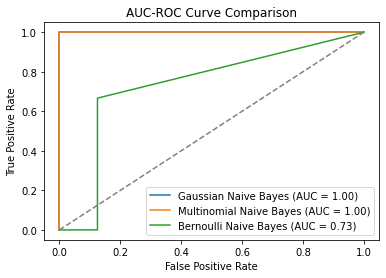

In [73]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Instantiate the models
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB()
}

# Step 3: Train the models and evaluate them
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f"Evaluation for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # AUC-ROC curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Step 4: Plot the AUC-ROC curve for all models
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()